In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

df = pd.read_csv('cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,high school,0,1,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [4]:
rg_model = LogisticRegression()
rg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [7]:
y_pred = rg_model.predict(X_test)
print(y_pred)

y_test_pred_proba = rg_model.predict_proba(X_test)
print(y_test_pred_proba)

metrics.accuracy_score(y_test,y_pred)

[0 0 0 ... 0 0 0]
[[0.74826949 0.25173051]
 [0.5842971  0.4157029 ]
 [0.7960448  0.2039552 ]
 ...
 [0.5842971  0.4157029 ]
 [0.82721525 0.17278475]
 [0.66393453 0.33606547]]


0.7834239639977498

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [8]:
metrics.roc_auc_score(y_test, y_test_pred_proba[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve with LIMIT_BAL feature using logistic regression ')

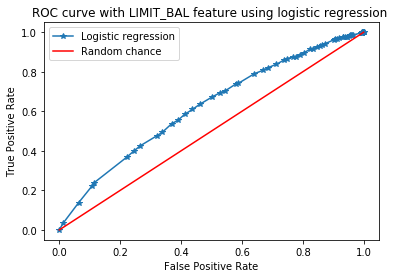

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve with LIMIT_BAL feature using logistic regression ')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [10]:
precision, recall, thresh = metrics.precision_recall_curve(y_test, y_test_pred_proba[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0, 1)

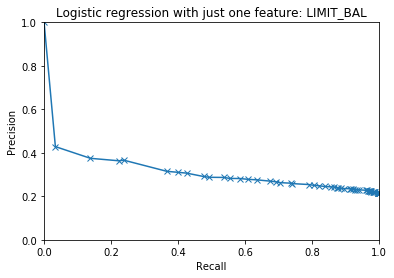

In [11]:
plt.plot(recall, precision, 'x-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic regression with just one feature: LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [12]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [13]:
y_train_pred_proba = rg_model.predict_proba(X_train)
metrics.roc_auc_score(y_train, y_train_pred_proba[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
